In [64]:
# Import common libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

**Load Dataset**

In [65]:
# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocessing
# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Apply preprocessing to training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

<ipython-input-65-9101ed36c5e7>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-65-9101ed36c5e7>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

## 1. Multi Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Make predictions
y_pred_multi = model_multi.predict(X_test)

# Evaluate the model
mse_multi = mean_squared_error(y_test, y_pred_multi)
print(f"Multi-linear Regression MSE: {mse_multi:.2f}")

Multi-linear Regression MSE: 0.14


## 2. Simple Linear Regression

In [67]:
# Use only one feature (e.g., 'Fare')
X_train_fare = X_train[:, 1].reshape(-1, 1)  # 'Fare' is the second column
X_test_fare = X_test[:, 1].reshape(-1, 1)

# Initialize and train the model
model_simple = LinearRegression()
model_simple.fit(X_train_fare, y_train)

# Make predictions
y_pred_simple = model_simple.predict(X_test_fare)

# Evaluate the model
mse_simple = mean_squared_error(y_test, y_pred_simple)
print(f"Simple Linear Regression MSE: {mse_simple:.2f}")

Simple Linear Regression MSE: 0.22


## 2.Multi Linear Regression

## 3. Support Vector Machine (SVM)


In [68]:
from sklearn.svm import SVC

# Initialize and train the model
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.78


## 4. Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.81


## 5. K-Nearest Neighbors (KNN)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.80


## 6. Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = model_logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

Logistic Regression Accuracy: 0.81


##  7. Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.79


## 8. Storytelling

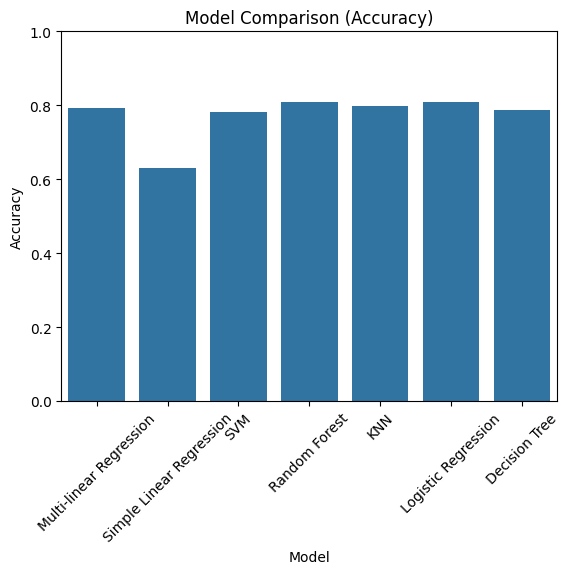

Key Insights:
- Random Forest and Logistic Regression perform the best on this dataset.
- Simple Linear Regression performs poorly, as it cannot capture the complexity of the data.
- Feature engineering and hyperparameter tuning can further improve model performance.


In [73]:
# Compare model accuracies
models = ['Multi-linear Regression', 'Simple Linear Regression', 'SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Decision Tree']
accuracies = [accuracy_score(y_test, (y_pred_multi > 0.5).astype(int)), accuracy_score(y_test, (y_pred_simple > 0.5).astype(int)), accuracy_svm, accuracy_rf, accuracy_knn, accuracy_logreg, accuracy_dt]

# Plot model comparison
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison (Accuracy)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Key insights
print("Key Insights:")
print("- Random Forest and Logistic Regression perform the best on this dataset.")
print("- Simple Linear Regression performs poorly, as it cannot capture the complexity of the data.")
print("- Feature engineering and hyperparameter tuning can further improve model performance.")

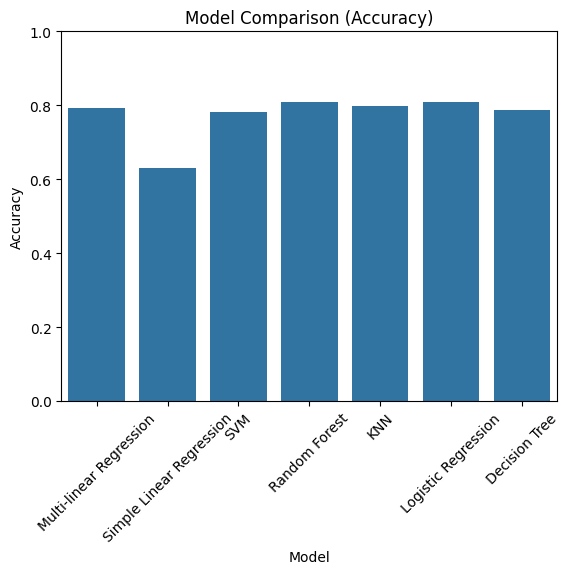

Key Insights:
- Random Forest and Logistic Regression perform the best on this dataset.
- Simple Linear Regression performs poorly, as it cannot capture the complexity of the data.
- Feature engineering and hyperparameter tuning can further improve model performance.


In [74]:
# Compare model accuracies
models = ['Multi-linear Regression', 'Simple Linear Regression', 'SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Decision Tree']
accuracies = [accuracy_score(y_test, (y_pred_multi > 0.5).astype(int)), accuracy_score(y_test, (y_pred_simple > 0.5).astype(int)), accuracy_svm, accuracy_rf, accuracy_knn, accuracy_logreg, accuracy_dt]

# Plot model comparison
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison (Accuracy)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Key insights
print("Key Insights:")
print("- Random Forest and Logistic Regression perform the best on this dataset.")
print("- Simple Linear Regression performs poorly, as it cannot capture the complexity of the data.")
print("- Feature engineering and hyperparameter tuning can further improve model performance.")